<a href="https://colab.research.google.com/github/SankithaDevatha/Python/blob/main/Rainfall%20Detection%20-%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload = files.upload()

In [1]:
import pandas as pd
dataset = pd.read_csv('weatherAUS.csv')
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
#DATA EXPLORATION

dataset.shape #gives number of rows and columns

(21900, 23)

In [4]:
dataset.columns # gives column names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
dataset.info() #gives info about the dataset with number of null vales in the dataset and the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21900 entries, 0 to 21899
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           21900 non-null  object 
 1   Location       21900 non-null  object 
 2   MinTemp        21453 non-null  float64
 3   MaxTemp        21573 non-null  float64
 4   Rainfall       21398 non-null  float64
 5   Evaporation    7520 non-null   float64
 6   Sunshine       4876 non-null   float64
 7   WindGustDir    18216 non-null  object 
 8   WindGustSpeed  18218 non-null  float64
 9   WindDir9am     18919 non-null  object 
 10  WindDir3pm     20027 non-null  object 
 11  WindSpeed9am   21189 non-null  float64
 12  WindSpeed3pm   20510 non-null  float64
 13  Humidity9am    21408 non-null  float64
 14  Humidity3pm    20714 non-null  float64
 15  Pressure9am    18310 non-null  float64
 16  Pressure3pm    18314 non-null  float64
 17  Cloud9am       12162 non-null  float64
 18  Cloud3

In [6]:
dataset.describe() #gives count, min, max, variance, standard deviation of each columns

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,21453.000000,21573.000000,21398.000000,7520.000000,4876.000000,18218.000000,21189.000000,20510.000000,21408.000000,20714.000000,18310.000000,18314.000000,12162.000000,11850.000000,21551.000000,20863.000000
mean,13.030634,24.226283,2.628391,6.146130,8.119032,37.645461,12.363585,16.595953,69.244021,51.306894,1018.240573,1015.593404,4.129666,4.342194,17.878061,22.730533
std,5.987940,6.320662,9.749826,5.262074,3.762443,13.118763,9.047347,9.193030,18.090502,21.436391,6.574577,6.502107,3.033737,2.756305,5.580146,6.157241
min,-3.300000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000
25%,8.500000,19.500000,0.000000,3.000000,5.800000,28.000000,6.000000,9.000000,57.000000,35.000000,1013.800000,1011.200000,1.000000,1.000000,13.900000,18.100000
50%,13.500000,23.700000,0.000000,4.800000,9.300000,35.000000,11.000000,15.000000,70.000000,52.000000,1018.300000,1015.600000,4.000000,5.000000,18.300000,22.100000
75%,17.900000,28.200000,0.600000,8.000000,10.900000,44.000000,19.000000,22.000000,83.000000,67.000000,1022.700000,1020.000000,7.000000,7.000000,22.000000,26.600000
max,29.700000,47.300000,371.000000,86.200000,14.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,37.700000,46.700000


In [7]:
dataset.describe(include='all') #gives descrpition of all columns

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,21900,21900,21453.000000,21573.000000,21398.000000,7520.000000,4876.000000,18216,18218.000000,18919,...,21408.000000,20714.000000,18310.000000,18314.000000,12162.000000,11850.000000,21551.000000,20863.000000,21398,21398
unique,3040,8,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2010-09-30,Albury,NaN,NaN,NaN,NaN,NaN,NNE,NaN,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,8,3040,NaN,NaN,NaN,NaN,NaN,1722,NaN,2121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16802,16801
mean,NaN,NaN,13.030634,24.226283,2.628391,6.146130,8.119032,NaN,37.645461,NaN,...,69.244021,51.306894,1018.240573,1015.593404,4.129666,4.342194,17.878061,22.730533,NaN,NaN
std,NaN,NaN,5.987940,6.320662,9.749826,5.262074,3.762443,NaN,13.118763,NaN,...,18.090502,21.436391,6.574577,6.502107,3.033737,2.756305,5.580146,6.157241,NaN,NaN
min,NaN,NaN,-3.300000,6.800000,0.000000,0.000000,0.000000,NaN,7.000000,NaN,...,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000,NaN,NaN
25%,NaN,NaN,8.500000,19.500000,0.000000,3.000000,5.800000,NaN,28.000000,NaN,...,57.000000,35.000000,1013.800000,1011.200000,1.000000,1.000000,13.900000,18.100000,NaN,NaN
50%,NaN,NaN,13.500000,23.700000,0.000000,4.800000,9.300000,NaN,35.000000,NaN,...,70.000000,52.000000,1018.300000,1015.600000,4.000000,5.000000,18.300000,22.100000,NaN,NaN
75%,NaN,NaN,17.900000,28.200000,0.600000,8.000000,10.900000,NaN,44.000000,NaN,...,83.000000,67.000000,1022.700000,1020.000000,7.000000,7.000000,22.000000,26.600000,NaN,NaN


In [8]:
dataset.nunique() #checking unique values for each column

Date             3040
Location            8
MinTemp           321
MaxTemp           374
Rainfall          414
Evaporation       214
Sunshine          140
WindGustDir        16
WindGustSpeed      58
WindDir9am         16
WindDir3pm         16
WindSpeed9am       39
WindSpeed3pm       39
Humidity9am        97
Humidity3pm       100
Pressure9am       410
Pressure3pm       413
Cloud9am            9
Cloud3pm            9
Temp9am           339
Temp3pm           370
RainToday           2
RainTomorrow        2
dtype: int64

<ipython-input-9-7d0e01892472>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


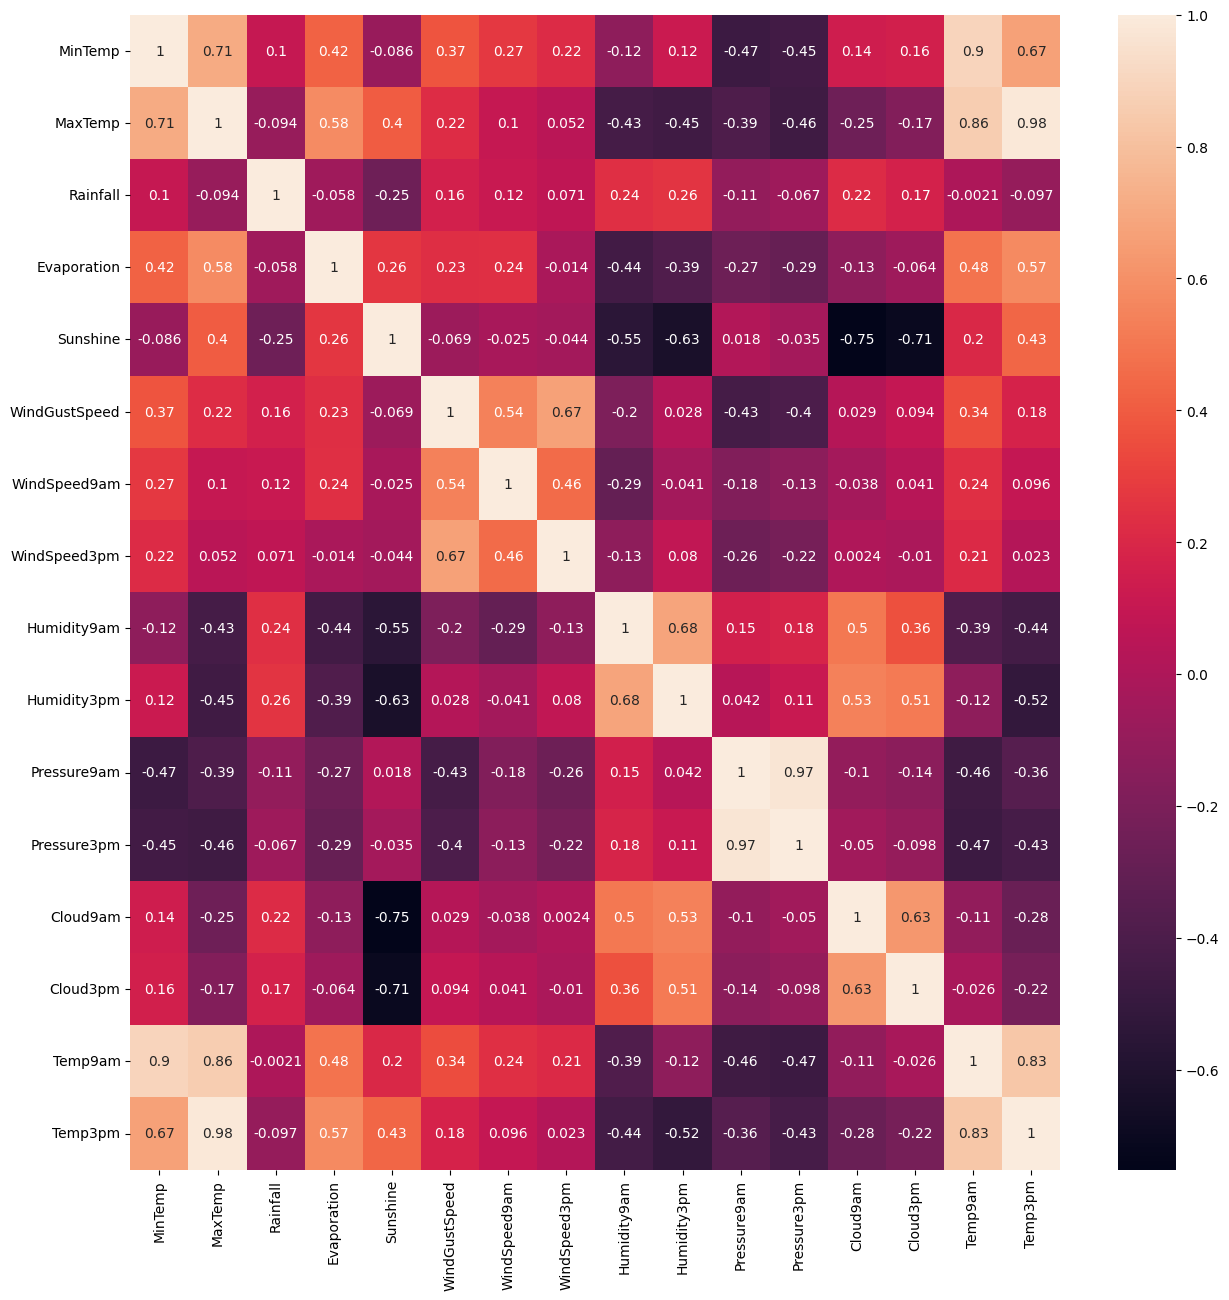

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#checking correlation between the columns
correlation = dataset.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True)
plt.show()

In [10]:
dataset.isna().sum() #checking null values in each colomns

Date                 0
Location             0
MinTemp            447
MaxTemp            327
Rainfall           502
Evaporation      14380
Sunshine         17024
WindGustDir       3684
WindGustSpeed     3682
WindDir9am        2981
WindDir3pm        1873
WindSpeed9am       711
WindSpeed3pm      1390
Humidity9am        492
Humidity3pm       1186
Pressure9am       3590
Pressure3pm       3586
Cloud9am          9738
Cloud3pm         10050
Temp9am            349
Temp3pm           1037
RainToday          502
RainTomorrow       502
dtype: int64

In [11]:
#calculate how much percenatge of data is missing
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Sunshine,17024,0.777352
Evaporation,14380,0.656621
Cloud3pm,10050,0.458904
Cloud9am,9738,0.444658
WindGustDir,3684,0.168219


In [12]:
#Dropping some columns that has more null values
dataset = dataset.drop(['Date','Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)

In [13]:
dataset.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [15]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
#categorized column's missing values are replaced with -1, as -1 means null values represents null in categorized data
cat_list = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow']
for column in cat_list:
    dataset[column] = pd.Categorical(dataset[column])
    dataset[column] = dataset[column].cat.codes
    dataset[column].replace(-1, np.NaN, inplace=True)

In [16]:
#Split dataset into train and test set. Train set only include non-null values for given feature, and test set only include null values for given feature.
#Run KNN model to predict null values
#Return Dataset


def filling_null(feature, df=dataset):

    #make train set and test set
    temp_df = df.copy().drop('RainTomorrow', axis=1)
    df_list = list(temp_df.columns)
    df_list.remove(feature)
    temp_df.dropna(subset=df_list, inplace=True)
    train = temp_df.loc[temp_df.notna()[feature]]
    train_x = train.drop(feature, axis=1)
    train_y = train[feature]
    test = temp_df[temp_df.isnull()[feature]].drop(feature,axis=1)
     #run machine learning model and predict null values
    KNN = KNeighborsRegressor(n_jobs=-1)
    KNN.fit(train_x, train_y)
    change_NaN = KNN.predict(test)
    index_list = test.index.tolist()
    for i in range(len(change_NaN)):
        df.at[index_list[i], feature]= change_NaN[i]

    #return dataset which had been changed
    return df

In [17]:
apply_list =['MinTemp', 'MaxTemp', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Humidity9am',
             'Humidity3pm', 'Pressure9am', 'Pressure3pm']

In [18]:
for feature in apply_list:
    df = filling_null(feature = feature)

In [19]:
dataset

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0
1,0,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0
2,0,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0
3,0,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0
4,0,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21895,7,21.9,26.1,0.0,2.0,46.0,2.0,2.0,24.0,28.0,75.0,69.0,1018.2,1016.4,24.2,25.6,0.0,0.0
21896,7,22.0,27.0,0.0,2.0,48.0,2.0,2.0,20.0,28.0,79.0,82.0,1015.9,1014.3,25.4,25.0,0.0,1.0
21897,7,22.9,28.0,3.4,1.0,37.0,0.0,1.0,17.0,26.0,89.0,77.0,1014.7,1014.0,25.1,27.0,1.0,1.0
21898,7,22.2,26.9,4.2,0.0,43.0,0.0,2.0,26.0,30.0,80.0,69.0,1015.9,1014.5,25.2,25.2,1.0,0.0


In [20]:
datset_NO_null = dataset.fillna(dataset.median())

In [21]:
datset_NO_null.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [22]:
datset_NO_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21900 entries, 0 to 21899
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21900 non-null  int8   
 1   MinTemp        21900 non-null  float64
 2   MaxTemp        21900 non-null  float64
 3   Rainfall       21900 non-null  float64
 4   WindGustDir    21900 non-null  float64
 5   WindGustSpeed  21900 non-null  float64
 6   WindDir9am     21900 non-null  float64
 7   WindDir3pm     21900 non-null  float64
 8   WindSpeed9am   21900 non-null  float64
 9   WindSpeed3pm   21900 non-null  float64
 10  Humidity9am    21900 non-null  float64
 11  Humidity3pm    21900 non-null  float64
 12  Pressure9am    21900 non-null  float64
 13  Pressure3pm    21900 non-null  float64
 14  Temp9am        21900 non-null  float64
 15  Temp3pm        21900 non-null  float64
 16  RainToday      21900 non-null  float64
 17  RainTomorrow   21900 non-null  float64
dtypes: flo

In [23]:
#Splitting the dataset into x and y

X =datset_NO_null.drop(['RainTomorrow'], axis=1)
X

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0
1,0,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0
2,0,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0
3,0,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0
4,0,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21895,7,21.9,26.1,0.0,2.0,46.0,2.0,2.0,24.0,28.0,75.0,69.0,1018.2,1016.4,24.2,25.6,0.0
21896,7,22.0,27.0,0.0,2.0,48.0,2.0,2.0,20.0,28.0,79.0,82.0,1015.9,1014.3,25.4,25.0,0.0
21897,7,22.9,28.0,3.4,1.0,37.0,0.0,1.0,17.0,26.0,89.0,77.0,1014.7,1014.0,25.1,27.0,1.0
21898,7,22.2,26.9,4.2,0.0,43.0,0.0,2.0,26.0,30.0,80.0,69.0,1015.9,1014.5,25.2,25.2,1.0


In [24]:
y = datset_NO_null['RainTomorrow']
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21895    0.0
21896    1.0
21897    1.0
21898    0.0
21899    0.0
Name: RainTomorrow, Length: 21900, dtype: float64

In [25]:
#Splitting the dataset into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
#CREATING MODELS

#Logistic Regression

from sklearn.linear_model import LogisticRegression

LogR = LogisticRegression()
LogR.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred = LogR.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report
accuracy_Log = accuracy_score(y_test, y_pred)
print('Accuracy score of Logistic Regression:{0:.2f}%'.format(accuracy_Log*100))
y_pred
print(classification_report(y_test,y_pred))


Accuracy score of Logistic Regression:84.98%
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      5238
         1.0       0.72      0.43      0.54      1332

    accuracy                           0.85      6570
   macro avg       0.79      0.69      0.72      6570
weighted avg       0.84      0.85      0.83      6570



In [29]:
from sklearn.ensemble import RandomForestClassifier

Ran = RandomForestClassifier()
Ran.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_pred = Ran.predict(X_test)

accuracy_Ran = accuracy_score(y_test,y_pred)
print('Accuracy score of Random Forest:{0:.2f}%'.format(accuracy_Ran*100))
y_pred
print(classification_report(y_test,y_pred))

Accuracy score of Random Forest:85.40%
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      5238
         1.0       0.73      0.45      0.56      1332

    accuracy                           0.85      6570
   macro avg       0.80      0.70      0.73      6570
weighted avg       0.84      0.85      0.84      6570



In [31]:
from sklearn.tree import DecisionTreeClassifier

Deci = DecisionTreeClassifier()
Deci.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred = Deci.predict(X_test)

accuracy_Deci = accuracy_score(y_test,y_pred)
print('Accuracy score of Random Forest:{0:.2f}%'.format(accuracy_Deci*100))
y_pred
print(classification_report(y_test,y_pred))

Accuracy score of Random Forest:78.19%
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      5238
         1.0       0.46      0.49      0.48      1332

    accuracy                           0.78      6570
   macro avg       0.67      0.67      0.67      6570
weighted avg       0.79      0.78      0.78      6570



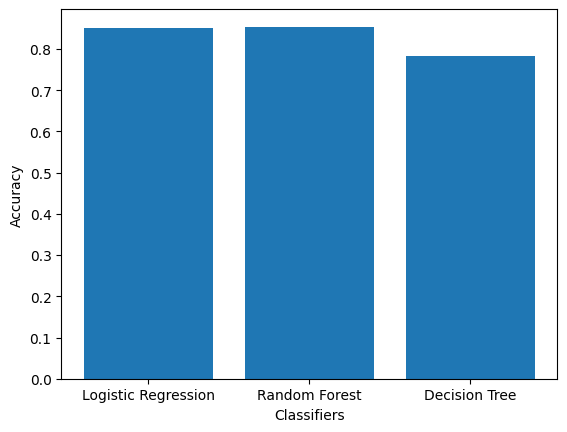

In [33]:
#Barplot for accuracy
import numpy as np
import matplotlib.pyplot as plt

x = ['Logistic Regression','Random Forest','Decision Tree']
y = [accuracy_Log ,accuracy_Ran ,accuracy_Deci]

plt.bar(x,y)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.show()